In [1]:
import pandas as pd
#from preprocessing import * # this will not work in Jupyter
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle

from gensim.parsing.preprocessing import preprocess_string
import re
import string
import random


from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import stem_text
from gensim.parsing.preprocessing import strip_numeric

# new from this notebook
import numpy as np
# Let's look at making the FAQ list better
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MeanShift

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in the data
ticket_dat = pd.read_csv('../data/ticket_dat.csv')
faq_dat = pd.read_csv('../data/faq_dat.csv')

# Replace the NaNs
ticket_dat.fillna('', inplace=True)
faq_dat.fillna('', inplace=True)

# Make sentences into lists
faq_ques = list(faq_dat.question)
n_faq_ques = len(faq_ques)

faq_ans = list(faq_dat.answer_title + " " + faq_dat.answer)
n_faq_ans = len(faq_ans)

ticket_ques = list(ticket_dat.question)
n_ticket_ques = len(ticket_ques)

ticket_ans = list(ticket_dat.answer)
n_ticket_ans = len(ticket_ans)

In [4]:
# initialise model
vectoriser = TfidfVectorizer(strip_accents='unicode', lowercase=True,analyzer='word')

In [6]:
# create matrix: rows = FAQ ans; cols = TI-IDF weighted word vector
matrix = vectoriser.fit_transform(faq_ans)
print(matrix.shape, len(faq_ans))

(389, 2375) 389


In [12]:
# calculate pairwise similarities
sim_matrix = cosine_similarity(matrix)

# deleting diagonal as all vecs will have a 100% similarity
for i in range(len(sim_matrix)):
    sim_matrix[i,i] = 0

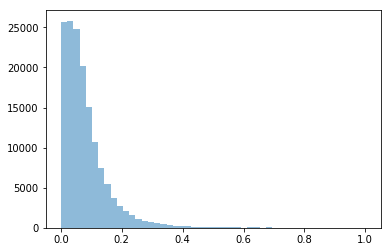

734.0


In [13]:
# visualise distribution
bins =  np.linspace(0, 1,50)
plt.hist(np.reshape(sim_matrix, (-1)), bins,alpha=.5)
plt.show()
# calculate high similaries
# divide by two because of double counting
print(np.sum(sim_matrix>0.4)/2)

In [16]:
ind = np.unravel_index(np.argmax(sim_matrix), (np.shape(sim_matrix)))
print('Index of largest similarity', np.unravel_index(np.argmax(sim_matrix), (np.shape(sim_matrix))))
print('Largest similarity value',np.max(sim_matrix))

Index of largest similarity (11, 35)
Largest similarity value 1.0000000000000002


In [17]:
# Look at FAQ to check
print(faq_ans[ind[0]],"\n\n", faq_ans[ind[1]])

Credit not loaded  The payment was stuck in the "reservation" stage, because you forgot to close the transaction with the "close" button.The payment is now completed and the money is available for printing.Please remember: always close the transaction window with the "close" button and wait until the ETH account summary is fully displayed after a payment. 

 Credit not loaded  The payment was stuck in the "reservation" stage, because you forgot to close the transaction with the "close" button.The payment is now completed and the money is available for printing. Please remember: always close the transaction window with the "close" button and wait until the ETH account summary is fully displayed after a payment. 


In [ ]:
# save results
# ??? somehow
# repeat
sim_matrix[ind] = 0
sim_matrix[ind[1], ind[0]] = 0
ind = np.unravel_index(np.argmax(sim_matrix), (np.shape(sim_matrix)))
print('Index of largest similarity', np.unravel_index(np.argmax(sim_matrix), (np.shape(sim_matrix))))
print('Largest similarity value',np.max(sim_matrix))

In [19]:
# other stuff I tried to calculate clusters directy:
clustering = MeanShift()

In [20]:
clustering.fit(matrix)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.